<h2> Kinetics <i>Clostridium diolis</i> </h2>

Replicated from Kaur et al., 2012.

In [3]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Monod Kinetics
def monod_rate(C,t):
    
    #Concentration vector: C = [cX, Cs, cP]
    cX = C[0]
    cS = C[1]
    cP = C[2]
    
    #rate constants
    a=1.12;
    b=1;
    mumax=0.65;
    Ks=12.8;
    Sm=98.3;
    Pm=65.2;
    K1=7.3;
    K2=0.15
    Ymax=0.57
    m=0.23;
    
    mu = mumax*(cS/(cS+Ks))*(1-(cS/Sm)**a)*(1-(cP/Pm)**b)

    rX = mu*cX
    rS = -((1/Ymax)*mu+m)*cX
    rP = (K1*mu+K2)*cX
    
    dC = np.array([rX,rS,rP])
    return dC

#Feed point
Cf = np.array([0.25, 54.15, 0])

In [7]:
t_end = 1.5
N_pts = 100
#ts = np.logspace(-3, sp.log10(t_end), N_pts)
ts = np.logspace(-3, t_end, num=N_pts,endpoint=True, base=10.0, dtype=None, axis=0)

pfr_cs = odeint(monod_rate,Cf,ts)

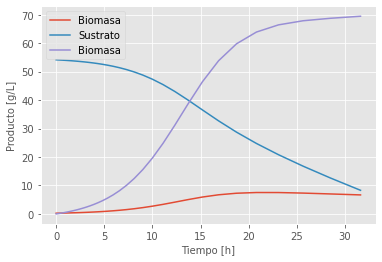

In [8]:
plt.plot(ts, pfr_cs[:,0], label="Biomasa")
plt.plot(ts, pfr_cs[:,1], label="Sustrato")
plt.plot(ts, pfr_cs[:,2], label="Biomasa")
plt.xlabel('Tiempo [h]', fontsize=10)
plt.ylabel('Producto [g/L]', fontsize=10)
plt.legend()
plt.show()

<h2>Reference</h2>
<p>Kaur, G., Srivastava, A.K., Chand, S., (2012). Advances in biotechnological production of 1,3-propanediol. Biochem. Eng. J. 64, 106–118. https://doi.org/10.1016/j.bej.2012.03.002 </p>